<a href="https://colab.research.google.com/github/uteyechea/Fuzzy-controller-for-2-toy-models/blob/main/Fuzzy_controller_for_two_toy_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from https://pythonhosted.org/scikit-fuzzy/ list of Introductory examples https://pythonhosted.org/scikit-fuzzy/auto_examples/index.html


#Problem 1

Description: Control de aperture of a camera lens, given varying conditions of luminosity and object speed. 

variable: Luminous Intensity or simply Light(L) as if Light where to be equivalent to Luminous Intenisty.
set of terms: {low light, high light (LH)} 
universe of discourse: [0,200] measured in lumens

variable: velocity ... (see Part 3)



##Part 1: Import all needed dependencies.

We will be using the skfuzzy control API

In [ ]:
import numpy as np
!pip install -U scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     |████████████████████████████████| 1.0MB 2.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=60a0400928f413ca02675ec4e9edafde6054e0fdbaa30a954796a882b0d28383
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


##Part 2: Define linguistic variables

x = <variable name, set of terms, universe of discourse, syntax, semantic >



In [ ]:
"""
New Antecedent/Consequent objects hold universe 
variables and membership functions
"""

#define input linguistic variables 
light=ctrl.Antecedent(np.arange(0,201,1),'light')
velocity=ctrl.Antecedent(np.arange(0,301,1),'velocity')
#define output linguistic variables
aperture=ctrl.Consequent(np.arange(-10,11,1),'aperture')

##Part 3: Assign membership functions for I/O's

class fuzz has a variety of different types of membership functions. All different types can be found here https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.membership.html

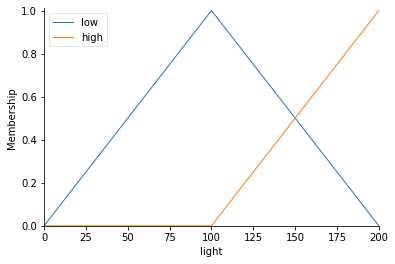

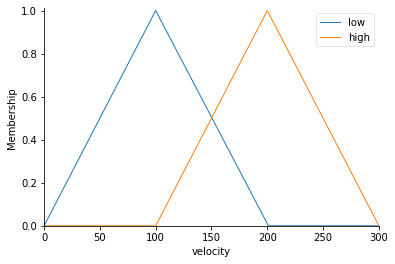

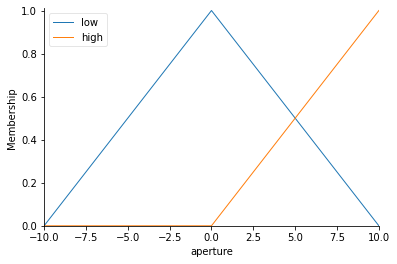

In [ ]:
"""
We are using a triangular membership function for al i/o's
Why? idc
"""

light['low'] = fuzz.trimf(light.universe, [0, 100, 200])
light['high'] = fuzz.trimf(light.universe, [100, 200, 200])

velocity['low']=fuzz.trimf(velocity.universe,[0,100,201])
velocity['high']=fuzz.trimf(velocity.universe,[100,200,300])

aperture['low']=fuzz.trimf(aperture.universe,[-10,0,10])
aperture['high']=fuzz.trimf(aperture.universe,[0,10,10])


#plot membership function
light.view()
velocity.view()
aperture.view()


##Part 4: Define rules

Rule() control function is defined here https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.control.html#rule

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77b0e9f2e8>)

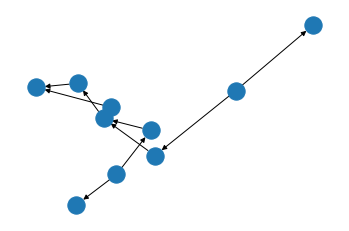

In [ ]:
"""
If most experts would agree on these rules, 
then we our fuzzy rules. The task at which fuzzy
logic excels is in mapping the imprecise rules 
into a defined, actionable output crisp value. 
"""
#if velocity low and light low then aperture high.
rule1=ctrl.Rule(velocity['low'] & light['low'], aperture['high'])
#etc
rule2=ctrl.Rule(velocity['high'] & light['low'], aperture['low'])
rule3=ctrl.Rule(velocity['low'] & light['high'], aperture['low'])
rule4=ctrl.Rule(velocity['high'] & light['high'], aperture['high'])

#You may visualize the rules 
rule1.view()

##Part 5: Control creation and simulation

In [ ]:
#Define controller object
aperture_adjustment=ctrl.ControlSystem([rule1,rule2,rule3,rule4])
#Simulate controller 
aperture_adjustment=ctrl.ControlSystemSimulation(aperture_adjustment)
#Specify crisp input values
aperture_adjustment.input['light']=140
aperture_adjustment.input['velocity']=140
#Compute output crisp value
aperture_adjustment.compute()

##Part 6: Visualize fuzzy ouput

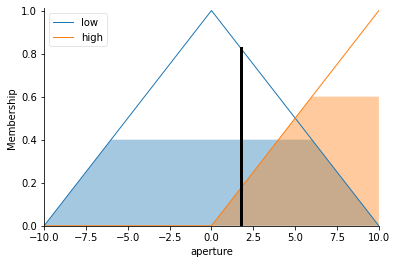

In [ ]:
aperture.view(sim=aperture_adjustment)

In [ ]:
print(aperture_adjustment.output['aperture'])

1.7560975609756098


###Doing another test run

1.2082213835281417


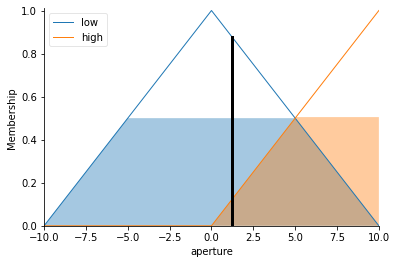

In [ ]:
#Specify crisp input values
aperture_adjustment.input['light']=110
aperture_adjustment.input['velocity']=150
#Compute output crisp value
aperture_adjustment.compute()

print(aperture_adjustment.output['aperture'])
aperture.view(sim=aperture_adjustment)

#Problem 2

##Part 2 Define linguistic variables

x = <variable name, set of terms, universe of discourse, syntax, semantic >

In [ ]:
"""
New Antecedent/Consequent objects hold universe 
variables and membership functions
"""

#define input linguistic variables 
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
#define output linguistic variables
tip = ctrl.Consequent(np.arange(5, 26, 1), 'tip')

##Part 3: Assign membership functions for I/O's

class fuzz has a variety of different types of membership functions. All different types can be found here https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.membership.html

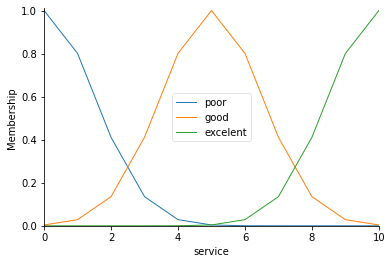

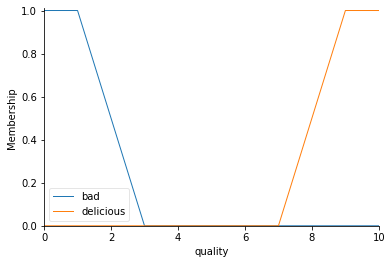

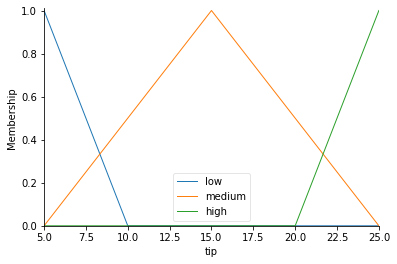

In [ ]:
"""
We are using a gaussian membership function for al i/o's
Why? idc
"""

service['poor'] = fuzz.gaussmf(service.universe, mean=0,sigma=1.5)
service['good'] = fuzz.gaussmf(service.universe, mean=5,sigma=1.5)
service['excelent'] = fuzz.gaussmf(service.universe, mean=10,sigma=1.5)

quality['bad']=fuzz.trapmf(quality.universe,[0,0,1,3])
quality['delicious']=fuzz.trapmf(quality.universe,[7,9,10,10])

tip['low']=fuzz.trimf(tip.universe,[0,5,10])
tip['medium']=fuzz.trimf(tip.universe,[5,15,25])
tip['high']=fuzz.trimf(tip.universe,[20,25,30])


#plot membership function
service.view()
quality.view()
tip.view()


##Part 4: Define rules

Rule() control function is defined here https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.control.html#rule

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f77adea4630>)

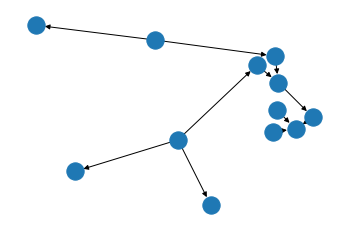

In [ ]:
"""
If most experts would agree on these rules, 
then we our fuzzy rules. The task at which fuzzy
logic excels is in mapping the imprecise rules 
into a defined, actionable output crisp value. 
"""
#if velocity low and light low then aperture high.
rule1=ctrl.Rule(service['poor'] | quality['bad'], tip['low'])
#etc
rule2=ctrl.Rule(service['good'], tip['medium'])
rule3=ctrl.Rule(service['excelent'] | quality['delicious'], tip['high'])


#You may visualize the rules 
rule1.view()

##Part 5: Control creation and simulation with Mamdani

In [ ]:
#Define controller object
tipping=ctrl.ControlSystem([rule1,rule2,rule3])
#Simulate controller 
tipping=ctrl.ControlSystemSimulation(tipping)
#Specify crisp input values 
tipping.input['service']=3
tipping.input['quality']=8
#Compute output crisp value
tipping.compute()

##Part 6: Visualize fuzzy ouput for Mandani

16.080661955638266


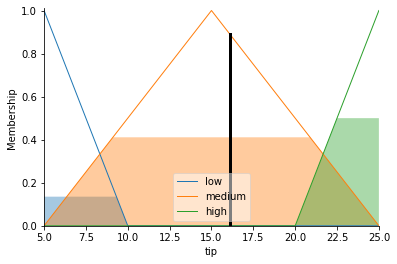

In [ ]:
tip.view(sim=tipping)
print(tipping.output['tip'])

In [ ]:
# Defuzzify this membership function five ways
tip=np.arange(0,13,1)
mfx_tip=fuzz.trimf(tip,[0,6,12])
defuzz_centroid = fuzz.defuzz(tip, mfx_tip, 'centroid')  # Same as skfuzzy.centroid
print(defuzz_centroid)
#defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
#defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
#defuzz_som = fuzz.defuzz(x, mfx, 'som')
#defuzz_lom = fuzz.defuzz(x, mfx, 'lom')


6.0
